In [ ]:
# =============================
# 1. 환경 설정 및 폰트 설치
# =============================
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rc("font", family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False

# 한글 폰트 테스트
# plt.figure(figsize=(5, 2))
# plt.title("한글 테스트")
# plt.plot([1, 2, 3], [1, 2, 3])
# plt.show()

# Drive 마운트
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)
    print("Google Drive 마운트 완료.")
except ImportError:
    print("Google Colab 환경이 아닙니다. 로컬 경로를 직접 설정하세요.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# ===============================================
# 2. 데이터 로드 및 통합 (Train + Validation)
# ===============================================
# 경로 설정
PROJECT_PATH = "/content/drive/MyDrive/Projects/마인드로그_가비지컬렉터"
SAVE_DIR = os.path.join(PROJECT_PATH, "eda_results")
DRIVE_BASE_PATH = os.path.join(PROJECT_PATH, "data")
WORK_PATH = "/content"

# 파일명 정의
XLSX_TRAIN_FILE = "감성대화말뭉치_Training.xlsx"
XLSX_VALID_FILE = "감성대화말뭉치_Validation.xlsx"

# 저장 폴더가 없으면 생성
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
    print(f"[INFO] 폴더 생성 완료: {SAVE_DIR}")
else:
    print(f"[INFO] 저장 경로 확인: {SAVE_DIR}")

# 이미지 저장 헬퍼 함수
def save_fig(filename):
    path = os.path.join(SAVE_DIR, filename)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f" >> 이미지 저장됨: {filename}")

# 파일 복사 함수
def copy_and_load(filename):
    src = os.path.join(DRIVE_BASE_PATH, filename)
    dst = os.path.join(WORK_PATH, filename)

    if os.path.exists(src):
        if not os.path.exists(dst): # 이미 있으면 복사 건너뜀
            shutil.copy(src, dst)
            print(f"[INFO] 파일 복사 완료: {dst}")
        return pd.read_excel(dst) # 엑셀 파일 로드
    else:
        print(f"[ERROR] 원본 파일을 찾을 수 없습니다: {src}")
        return None

print("데이터 로딩 중...")
df_train = copy_and_load(XLSX_TRAIN_FILE)
df_valid = copy_and_load(XLSX_VALID_FILE)

# EDA를 위해 데이터 합치기
if df_train is not None and df_valid is not None:
    df_train["split"] = "train"
    df_valid["split"] = "valid"

    df_all = pd.concat([df_train, df_valid], ignore_index=True)
    print(f"\n[INFO] 데이터 통합 완료. 총 데이터 개수: {len(df_all)}개")
    print(f" - Train: {len(df_train)}개")
    print(f" - Valid: {len(df_valid)}개")
else:
    print("[ERROR] 데이터 로드 실패")

[INFO] 저장 경로 확인: /content/drive/MyDrive/Projects/마인드로그_가비지컬렉터/eda_results
데이터 로딩 중...

[INFO] 데이터 통합 완료. 총 데이터 개수: 58271개
 - Train: 51630개
 - Valid: 6641개


In [ ]:
# ==========================================
# 3. 데이터 기본 확인
# ==========================================
print("\n[데이터 구조 확인]")
display(df_all.head(3))
print("\n[결측치 확인]")
print(df_all.isnull().sum())

# 필요한 컬럼만 선택
target_cols = ["연령", "성별", "상황키워드", "감정_대분류", "감정_소분류", "사람문장1"]
df_eda = df_all[target_cols].copy()


[데이터 구조 확인]


,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3,split
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN,train
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN,train
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN,train



[결측치 확인]
Unnamed: 0        0
연령                0
성별                0
상황키워드             0
신체질환              0
감정_대분류            0
감정_소분류            0
사람문장1             0
시스템문장1            0
사람문장2             0
시스템문장2            0
사람문장3         10890
시스템문장3        10890
split             0
dtype: int64


 >> 이미지 저장됨: 01_감정대분류_분포.png


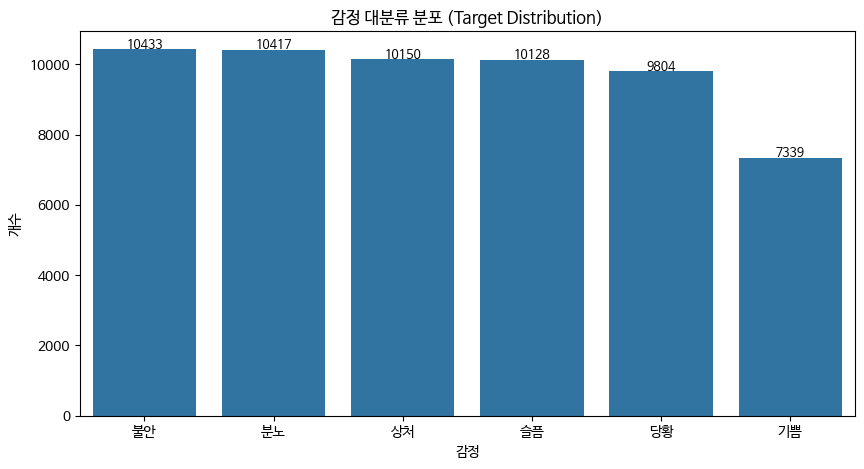

In [ ]:
# ==========================================
# 4. 데이터 분포 시각화 (Univariate)
# ==========================================
# (1) 감정 대분류 분포 (클래스 불균형 확인)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="감정_대분류", data=df_eda, order=df_eda["감정_대분류"].value_counts().index)
plt.title("감정 대분류 분포 (Target Distribution)")
plt.xlabel("감정")
plt.ylabel("개수")

# 막대 위에 숫자 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, int(height), ha = "center", size = 9)

save_fig("01_감정대분류_분포.png")
plt.show()

 >> 이미지 저장됨: 02_연령_성별_분포.png


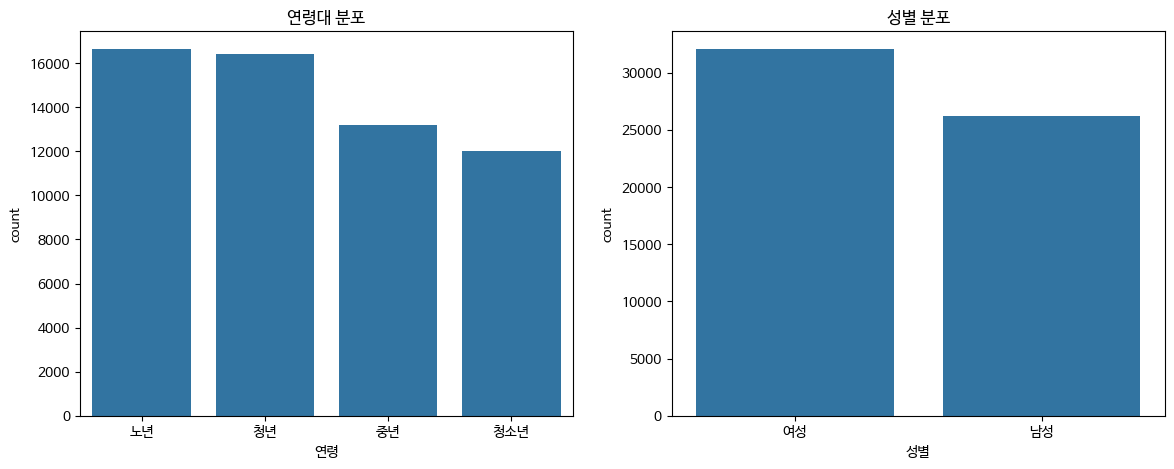

In [ ]:
# (2) 연령 및 성별 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x="연령", data=df_eda, order=df_eda["연령"].value_counts().index, ax=axes[0])
axes[0].set_title("연령대 분포")

sns.countplot(x="성별", data=df_eda, ax=axes[1])
axes[1].set_title("성별 분포")

save_fig("02_연령_성별_분포.png")
plt.show()

 >> 이미지 저장됨: 03_heatmap_연령_감정.png


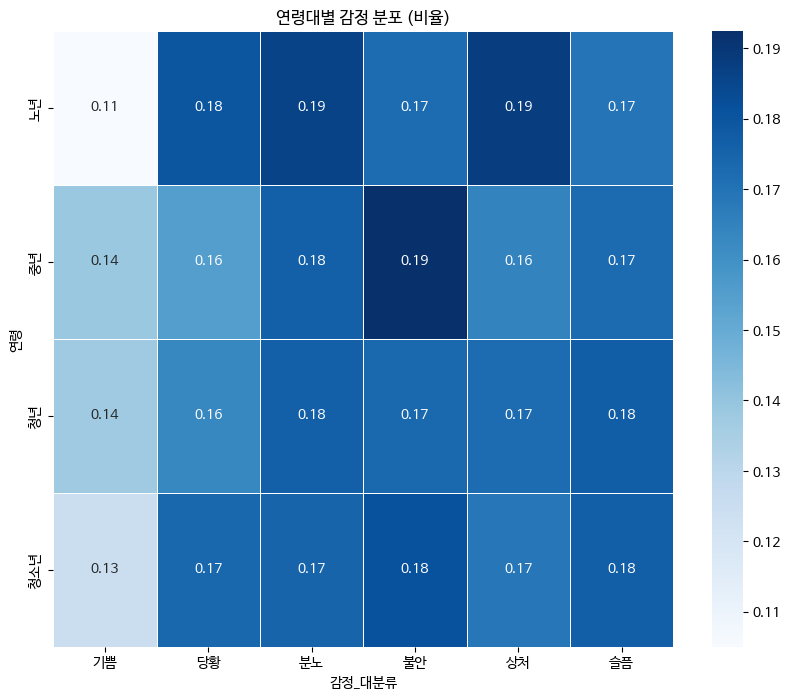

In [ ]:
# =====================
# 5. 상관관계 분석
# =====================

# "나이/성별이 감정 분류에 도움이 될까??"
def plot_heatmap(col1, col2, title, filename):
    crosstab = pd.crosstab(df_eda[col1], df_eda[col2], normalize="index")

    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
    plt.title(title)
    plt.ylabel(col1)
    plt.xlabel(col2)

    save_fig(filename)
    plt.show()

# (1) 연령 vs 감정 대분류
plot_heatmap("연령", "감정_대분류", "연령대별 감정 분포 (비율)", "03_heatmap_연령_감정.png")

 >> 이미지 저장됨: 04_heatmap_상황_감정.png


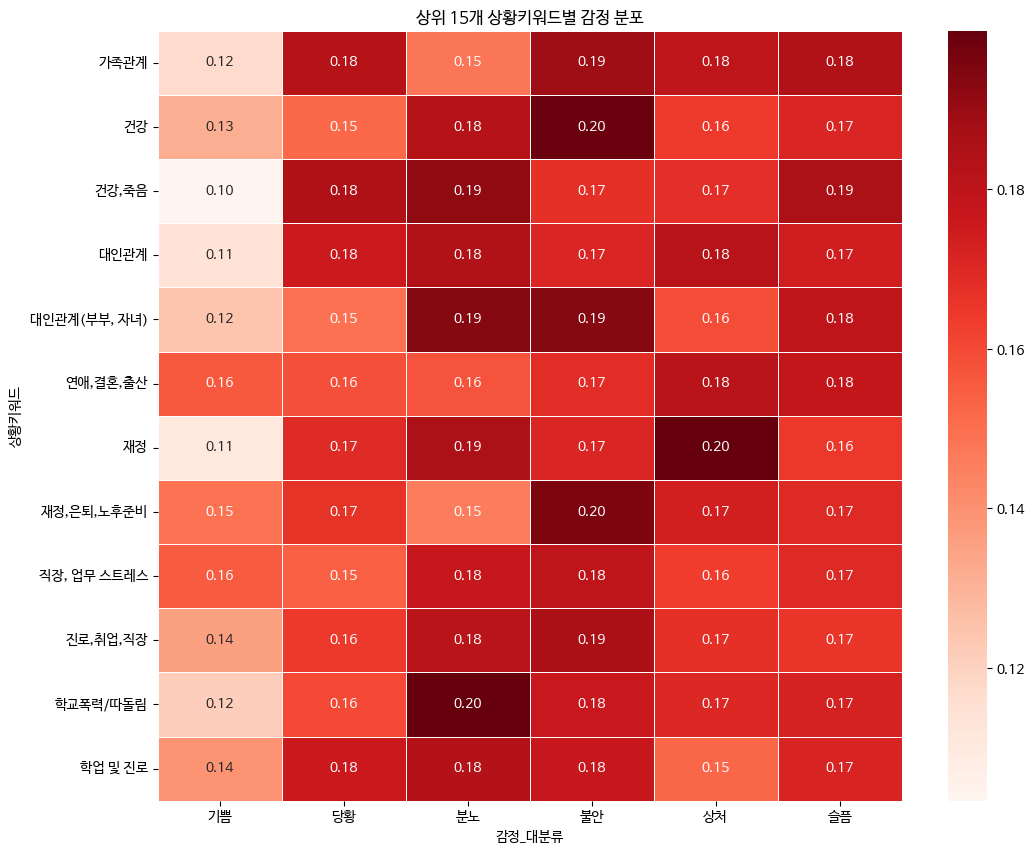

In [ ]:
# (2) 상황키워드 vs 감정 대분류 (상위 15개 상황만)
top_situations = df_eda["상황키워드"].value_counts().nlargest(15).index
df_situation_subset = df_eda[df_eda["상황키워드"].isin(top_situations)]

plt.figure(figsize=(12, 10))
crosstab_sit = pd.crosstab(df_situation_subset["상황키워드"], df_situation_subset["감정_대분류"], normalize="index")
sns.heatmap(crosstab_sit, annot=True, fmt=".2f", cmap="Reds", linewidths=.5)
plt.title("상위 15개 상황키워드별 감정 분포")

save_fig("04_heatmap_상황_감정.png")
plt.show()

 >> 이미지 저장됨: 05_문장길이_분포.png


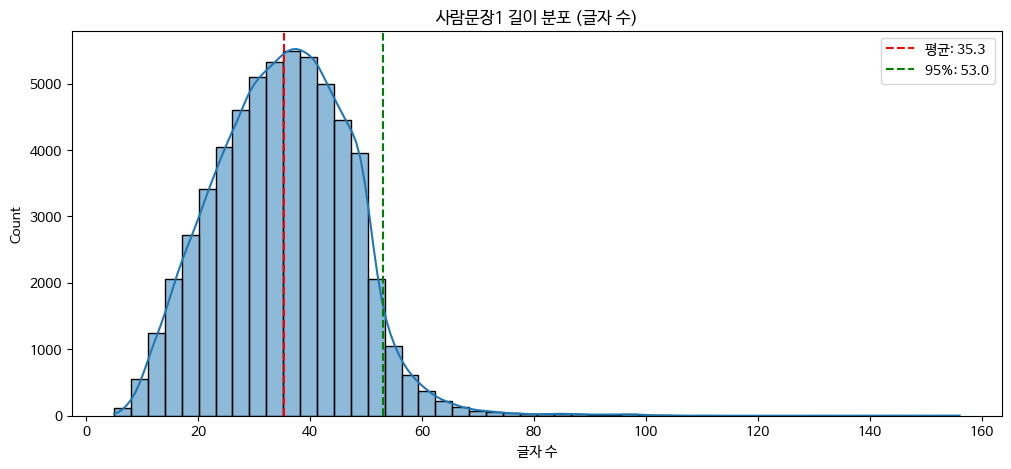

최대 길이: 156
권장 max_length (95% 커버): 53


In [ ]:
# ======================
# 6. 문장 길이 분석
# ======================
# 사람문장1의 길이 분포
df_eda["text_len"] = df_eda["사람문장1"].astype(str).apply(len)

plt.figure(figsize=(12, 5))
sns.histplot(df_eda["text_len"], bins=50, kde=True)
plt.title("사람문장1 길이 분포 (글자 수)")
plt.xlabel("글자 수")
plt.axvline(x=df_eda["text_len"].mean(), color="r", linestyle="--", label=f"평균: {df_eda["text_len"].mean():.1f}")
plt.axvline(x=np.percentile(df_eda["text_len"], 95), color="g", linestyle="--", label=f"95%: {np.percentile(df_eda["text_len"], 95):.1f}")
plt.legend()

save_fig("05_문장길이_분포.png")
plt.show()

print(f"최대 길이: {df_eda["text_len"].max()}")
print(f"권장 max_length (95% 커버): {int(np.percentile(df_eda["text_len"], 95))}")

 >> 이미지 저장됨: 05_merged_문장길이_분포.png


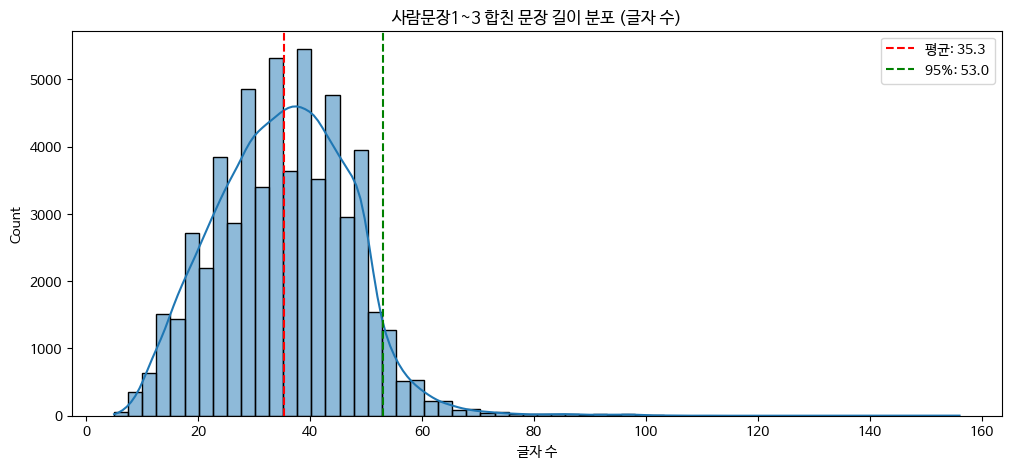

최대 길이: 156
권장 max_length (95% 범위): 53


In [ ]:
# 존재하는 컬럼만 선택
sentence_cols = [col for col in ["사람문장1", "사람문장2", "사람문장3"] if col in df_eda.columns]
df_eda[sentence_cols] = df_eda[sentence_cols].fillna("").astype(str)
df_eda["merged_text"] = df_eda[sentence_cols].agg(" ".join, axis=1).str.strip()
df_eda["merged_len"] = df_eda["merged_text"].apply(len)

plt.figure(figsize=(12, 5))
sns.histplot(df_eda["merged_len"], bins=60, kde=True)

plt.title("사람문장1~3 합친 문장 길이 분포 (글자 수)")
plt.xlabel("글자 수")

plt.axvline(
    x=df_eda["merged_len"].mean(),
    color="r",
    linestyle="--",
    label=f"평균: {df_eda['merged_len'].mean():.1f}"
)

plt.axvline(
    x=np.percentile(df_eda["merged_len"], 95),
    color="g",
    linestyle="--",
    label=f"95%: {np.percentile(df_eda['merged_len'], 95):.1f}"
)

plt.legend()

save_fig("05_merged_문장길이_분포.png")
plt.show()

print(f"최대 길이: {df_eda['merged_len'].max()}")
print(f"권장 max_length (95% 범위): {int(np.percentile(df_eda['merged_len'], 95))}")

In [ ]:
# ===========================
# 7. 워드클라우드 시각화
# ===========================
# 1) 라이브러리 설치 (최초 1회 필요)
!pip install wordcloud konlpy

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

# 2) 형태소 분석기 준비 (명사 추출용)
okt = Okt()

# 3) 워드클라우드 그리는 함수 정의
def draw_wordcloud(df, target_col, target_value, title, filename):
    # 해당 감정/상황에 맞는 데이터만 필터링
    filtered_df = df[df[target_col] == target_value]

    # 텍스트 데이터 뭉치기
    text_all = " ".join(filtered_df["사람문장1"].astype(str).tolist())

    # [중요] 명사만 추출 (시간이 좀 걸립니다)
    print(f" >> '{target_value}' 데이터 명사 추출 중...")
    nouns = okt.nouns(text_all)

    # 한 글자 단어 제거 (ex: 나, 저, 것, 수 등 의미 없는 단어 필터링)
    nouns = [n for n in nouns if len(n) > 1]

    # 단어 빈도수 계산
    counts = Counter(nouns)

    # 워드클라우드 설정
    wc = WordCloud(
        font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
        background_color="white",
        width=800,
        height=600,
        max_words=100, # 최대 단어 개수
        colormap="coolwarm" # 색상 테마 (viridis, plasma, inferno, magm 등 변경 가능)
    )

    # 워드클라우드 생성
    wc.generate_from_frequencies(counts)

    # 그림 그리기 및 저장
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off") # 축 끄기
    plt.title(title, fontsize=15)

    # 저장
    save_fig(filename)
    plt.show()

분석 대상 감정: ['분노' '기쁨' '불안' '당황' '슬픔' '상처']

[분노] 워드클라우드 생성 시작...
 >> '분노' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_분노.png


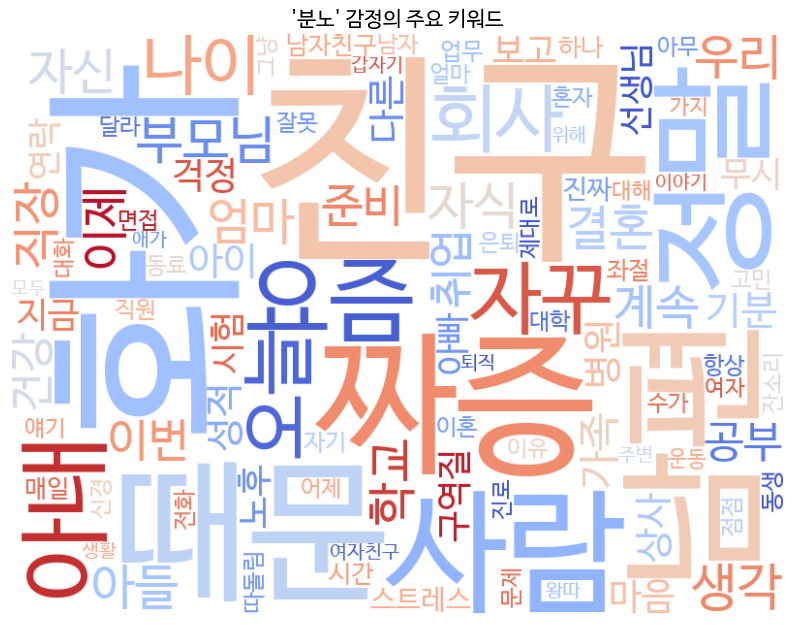


[기쁨] 워드클라우드 생성 시작...
 >> '기쁨' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_기쁨.png


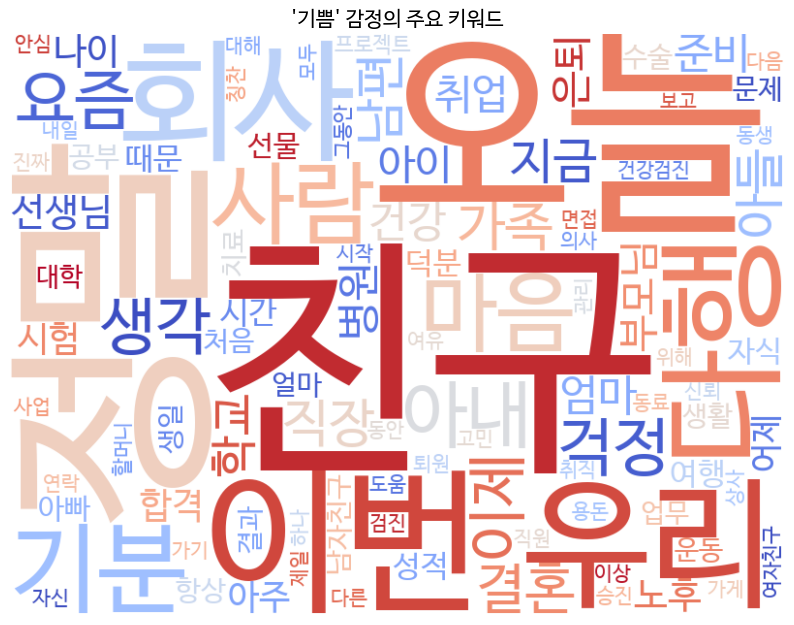


[불안] 워드클라우드 생성 시작...
 >> '불안' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_불안.png


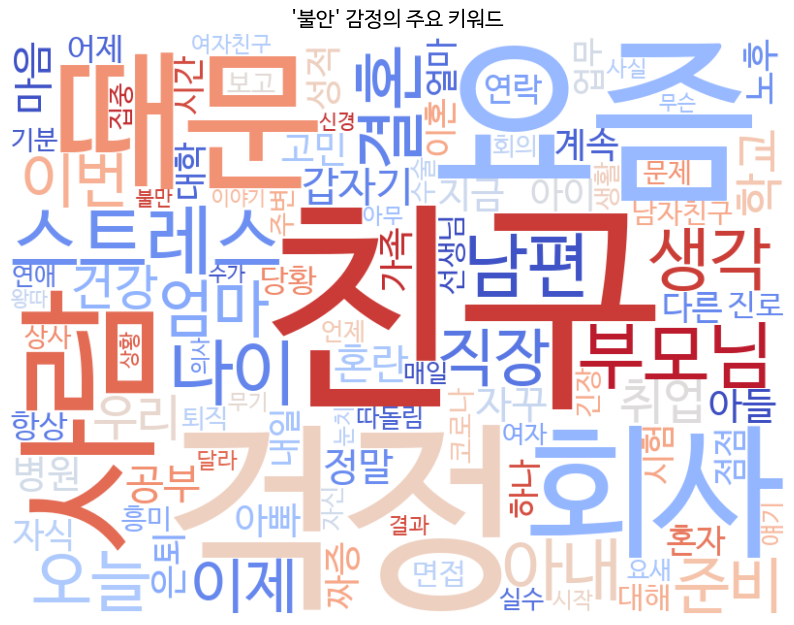


[당황] 워드클라우드 생성 시작...
 >> '당황' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_당황.png


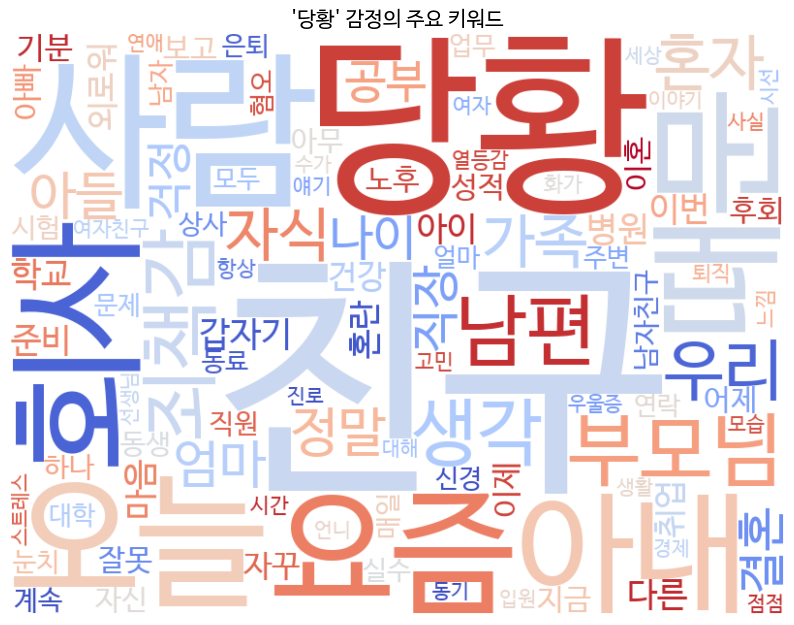


[슬픔] 워드클라우드 생성 시작...
 >> '슬픔' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_슬픔.png


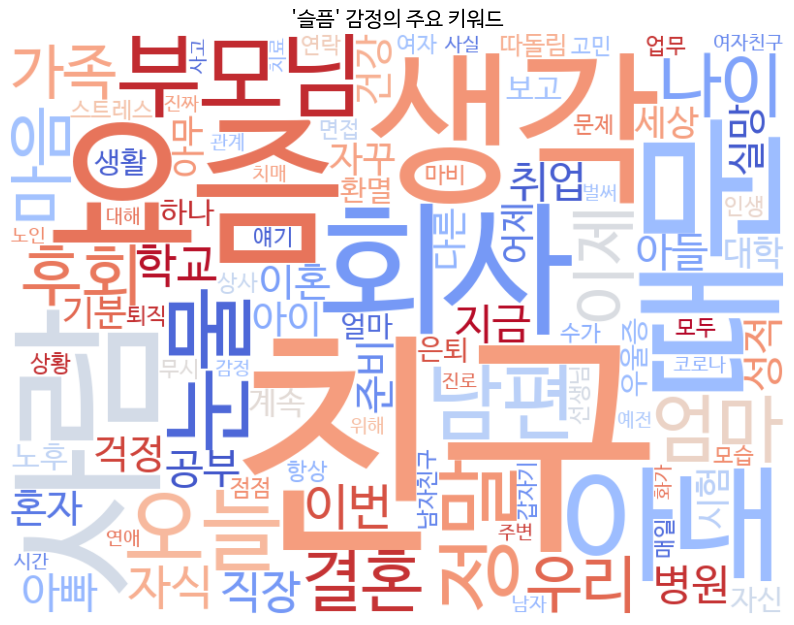


[상처] 워드클라우드 생성 시작...
 >> '상처' 데이터 명사 추출 중...
 >> 이미지 저장됨: wc_감정_상처.png


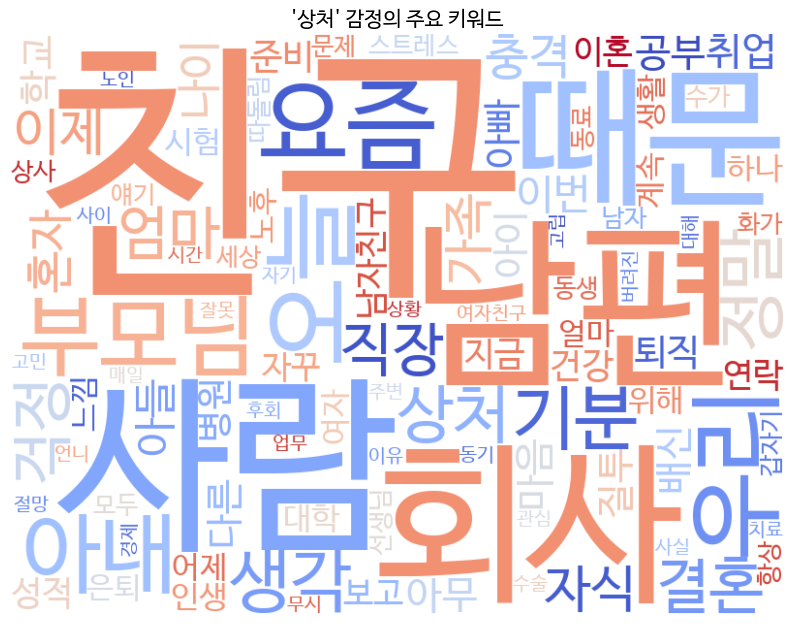

In [ ]:
emotions = df_eda["감정_대분류"].unique()

print(f"분석 대상 감정: {emotions}")

for emo in emotions:
    print(f"\n[{emo}] 워드클라우드 생성 시작...")
    draw_wordcloud(
        df=df_eda,
        target_col="감정_대분류",
        target_value=emo,
        title=f"'{emo}' 감정의 주요 키워드",
        filename=f"wc_감정_{emo}.png"
    )